# Assingment 5

**Piyush Chawla**

In [32]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import random
from scipy.spatial.distance import euclidean
data = pd.read_csv('TwoDimHard.csv')

In [96]:
def itr(data,means,k):
    clss = []
    for i in range(len(data)):
        clss.append(-1)
        temp = 10000
        for j in range(len(means)):
            if euclidean(data[i],means[j]) < temp:
                temp = euclidean(data[i],means[j])
                clss[i] = j
    means = np.zeros((k,data.shape[1]))
    counts = [0]*k
    for i in range(len(clss)):
        means[clss[i]] = np.add(means[clss[i]],data[i])
        counts[clss[i]]+=1
    for i in range(k):
        means[i] = means[i]/counts[i]
    return clss,means

def kmeans(data,k):
    indx = random.sample(range(len(data)),k)
    means = []
    clss = [-1]*len(data)
    for i in indx:
        means.append(data[i])
    means = np.array(means)
    
    while True:
        _clss,_means = itr(data,means,k)
        if clss==_clss:
            break
        clss = _clss
        means = _means
        
    return clss,means

In [47]:
colors = ['red','blue','green','yellow','orange']
def plot(data,clss,k):
    _plot = []
    for i in range(k+1):
        _plot.append([])
    for i in range(len(data)):
        _plot[clss[i]].append(data[i])
    for i in range(0,k+1):
        if len(_plot[i])==0:
            continue
        _plot[i] = np.array(_plot[i])
        plt.scatter(_plot[i][:,0],_plot[i][:,1],c = colors[i])
    plt.show()
    

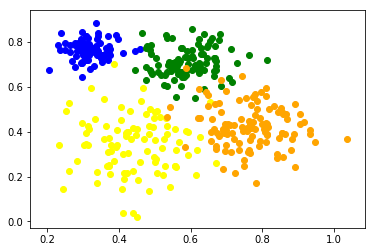

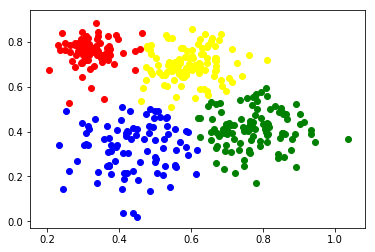

In [97]:
clss, means = kmeans(np.array(data[['X.1','X.2']]),4)
plot(np.array(data[['X.1','X.2']]),np.array(data['cluster']),4)
plot(np.array(data[['X.1','X.2']]),clss,4)

In [101]:
from sklearn.preprocessing import normalize
wine = pd.read_csv('winequality-red.csv',sep=';')
wine.iloc[0]
tmp = []

for i in range(len(wine)):
    if wine['quality'].iloc[i]<= 5:
        tmp.append(0)
    else:
        tmp.append(1)
wine['quality'] = tmp

for i in list(wine.keys()):
    if i == 'quality':
        continue
    else:
        wine[i] = normalize(np.array(wine[i]).reshape(1, -1))[0]

In [131]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
clustering = DBSCAN(min_samples=5).fit(np.array(wine)[:,:-1])
print(clustering)
#kmeans = KMeans(n_clusters=2, random_state=0).fit(np.array(wine)[:,:-1])
#clustering = AgglomerativeClustering().fit(np.array(wine)[:,:-1])
np.sum(clustering.labels_)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)


0